## Exercise 9:

The lagrangian dual of the problem is:
\begin{gather}
X:=\{(x,y)\in \mathbb{R}_+^{N+M}\times \mathbb{B}^{N}: \sum\limits_{j\in N} x_{i,j}=1 \}\\
\max\limits_{(x,y)\in X} \sum\limits_{i \in M} \sum\limits_{j \in N} p_{i,j}x_{i,j} +
\sum\limits_{i \in M} \sum\limits_{j \in N} u_{i,j}(y_j-x_{i,j})- \sum\limits_{j \in N} f_j y_j
\end{gather}
We aim to show by Theorem 4 that $w_{LD}$ is the same as the best bound of the LP-relaxation. Therefore define :
\begin{gather}
\hat{X}:=\{(x,y)\in \mathbb{R}_+^{N+M}\times [0,1]^{N}: \sum\limits_{j\in N} x_{i,j}=1 \}
\end{gather}
Next take arbitrary $\hat{z}_1,\hat{z}_2\in \hat{X}$, let $\lambda\in[0,1]$ and define the convex combination $\hat{z}_3:= \lambda\hat{z}_1 + (1-\lambda)\hat{z}_2$. Then for $\hat{z}_3$ we have: $\sum\limits_{j\in N} \hat{x}_{3,i,j} = \sum\limits_{j\in N}\lambda \hat{x}_{1,i,j} + \sum\limits_{j\in N} (1-\lambda)\hat{x}_{2,i,j}=\lambda+(1-\lambda) =1$ and further $0 \leq\hat{y}_{3,j} = \lambda \hat{y}_{1,j} + (1-\lambda) \hat{y}_{2,j}\leq \lambda +(1-\lambda)=1 \quad \forall j\in N$, which shows $conv(X)\subseteq\hat{X}$. Note that the same can be done to show that $\hat{X}\subseteq conv(X)$, such that $\hat{X}= conv(X)$ and Theorem 4 is applicable. In general, we have by Theorem 3 and Theorem 4 that the bound $w_{LD}$ is at least as good as the best bound of the LP-relaxation. Therefore, $w_{LD}$ cant get weaker and its not always equals the best LP-relaxation bound, but stronger if $conv(X)\neq\hat{X}$.

To solve the LD we can rewrite the problem as:
\begin{gather}
X:=\{(x,y)\in \mathbb{R}_+^{N+M}\times \mathbb{B}^{N}: \sum\limits_{j\in N} x_{i,j}=1 \}\\
\max\limits_{(x,y)\in X} \sum\limits_{i \in M} \sum\limits_{j \in N} (p_{i,j} -u_{i,j})x_{i,j} +
\sum\limits_{j \in N} y_j(-f_j + \sum\limits_{i\in M}u_{i,j})
\end{gather}

Step 1: calculate the matrix $a_{i,j}=p_{i,j}-u_{i,j}$ and find for all $i$ the maximum argument $j_{max}(i)=argmax_{j} a_{i,j}$. Then if $a_{i,j_{max}(i)}>0$ set $x_{i,j_{max}(i)}=1$ and $x_{i,j_{max}(i)}=0$ else. This step can be done in $\mathcal{O}(NM)$.

Step 2: calculate $\sum\limits_{i\in M}u_{i,j} = \hat{u}_j \quad \forall j\in N$. If $\hat{u}_j-f_j>0$ set $y_j=1$, else set $y_j=0$. Step 2 can be done in $\mathcal{O}(NM)$.

Therefore, the overall complexity is $\mathcal{O}(NM)$.

## Exercise 10:

The lagrangian dual of the linear-program is:
\begin{gather}
\max 10 y_1 + 4y_2 + 14 y_3 + u(4-3y_1-y_2-4y_3)\\
y_1,y_2,y_3 \in \mathbb{B}
\end{gather}
To find the best lagrange multiplier $u$ and $w_{LD}$ we can draw all the solutions as lines over different values of u.

In [73]:
import numpy as np
from matplotlib import pyplot as plt

def constr(y1,y2,y3,u):
    return u*(4 - 3*y1 - y2 - 4*y3)

def obj(y1,y2,y3,u):
    return 10*y1 + 4*y2 + 14*y3 + constr(y1,y2,y3,u)

def solve_ip(x, u):
    objs = obj(x[:,0], x[:,1], x[:,2],u)
    i_best = np.argmax(objs)
    return objs[i_best], i_best


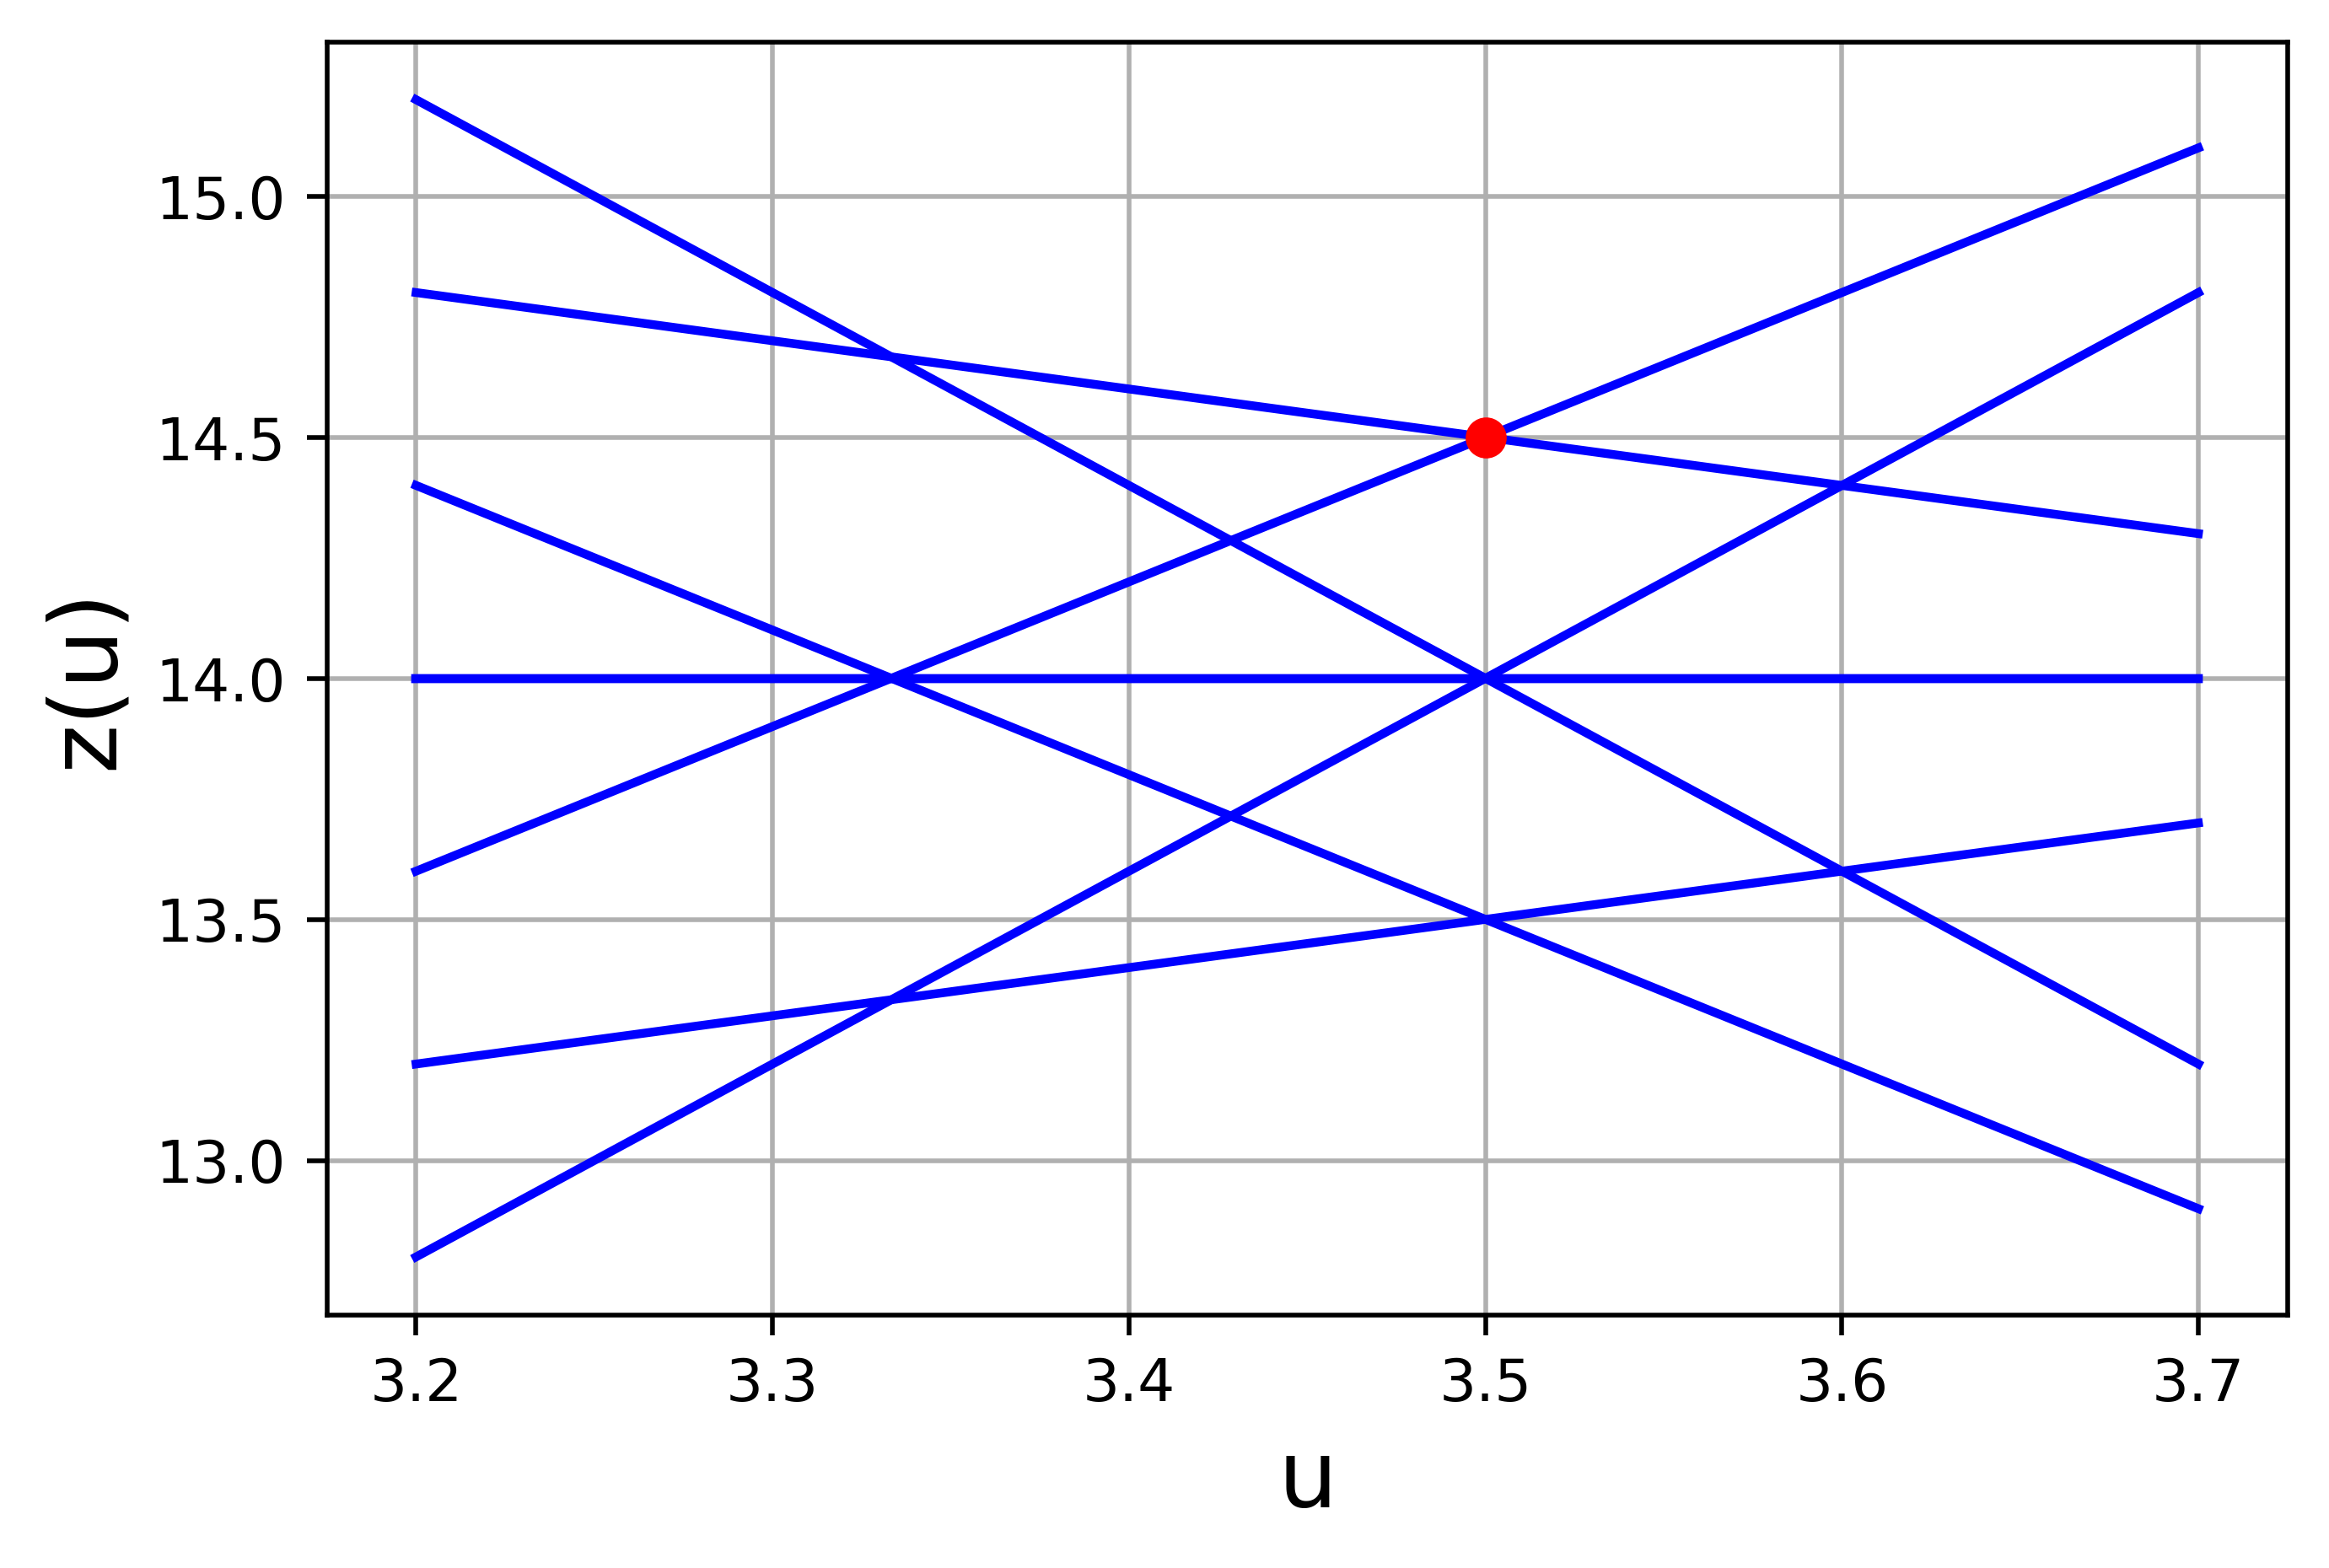

In [120]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 1000
# generate all 8 solutions
sols = np.unpackbits(np.arange(8,dtype="uint8"),axis=0).reshape(8,-1)[:,5:]
sols = sols.astype("float")
# draw all lines
u = np.linspace(3.2,3.7,5)
for n, sol in enumerate(sols):
    plt.plot(u,obj(sol[0],sol[1],sol[2],u),color="blue")
plt.plot(3.5,14.5,"o",color="red") # draw (u_opt, wLD)
plt.xlabel("u",fontsize=16)
plt.ylabel("z(u)",fontsize=16)
plt.grid(True)

We see that the optimal lagrange multiplier is $3.5$ and $w_{LD}=14.5$. Next we run the subgradient algorithm to find this optimal value for u. To show the convergence of the algorithm, we show the absolute error of the approximated value of u.

3.468748092651367 14.531253814697266


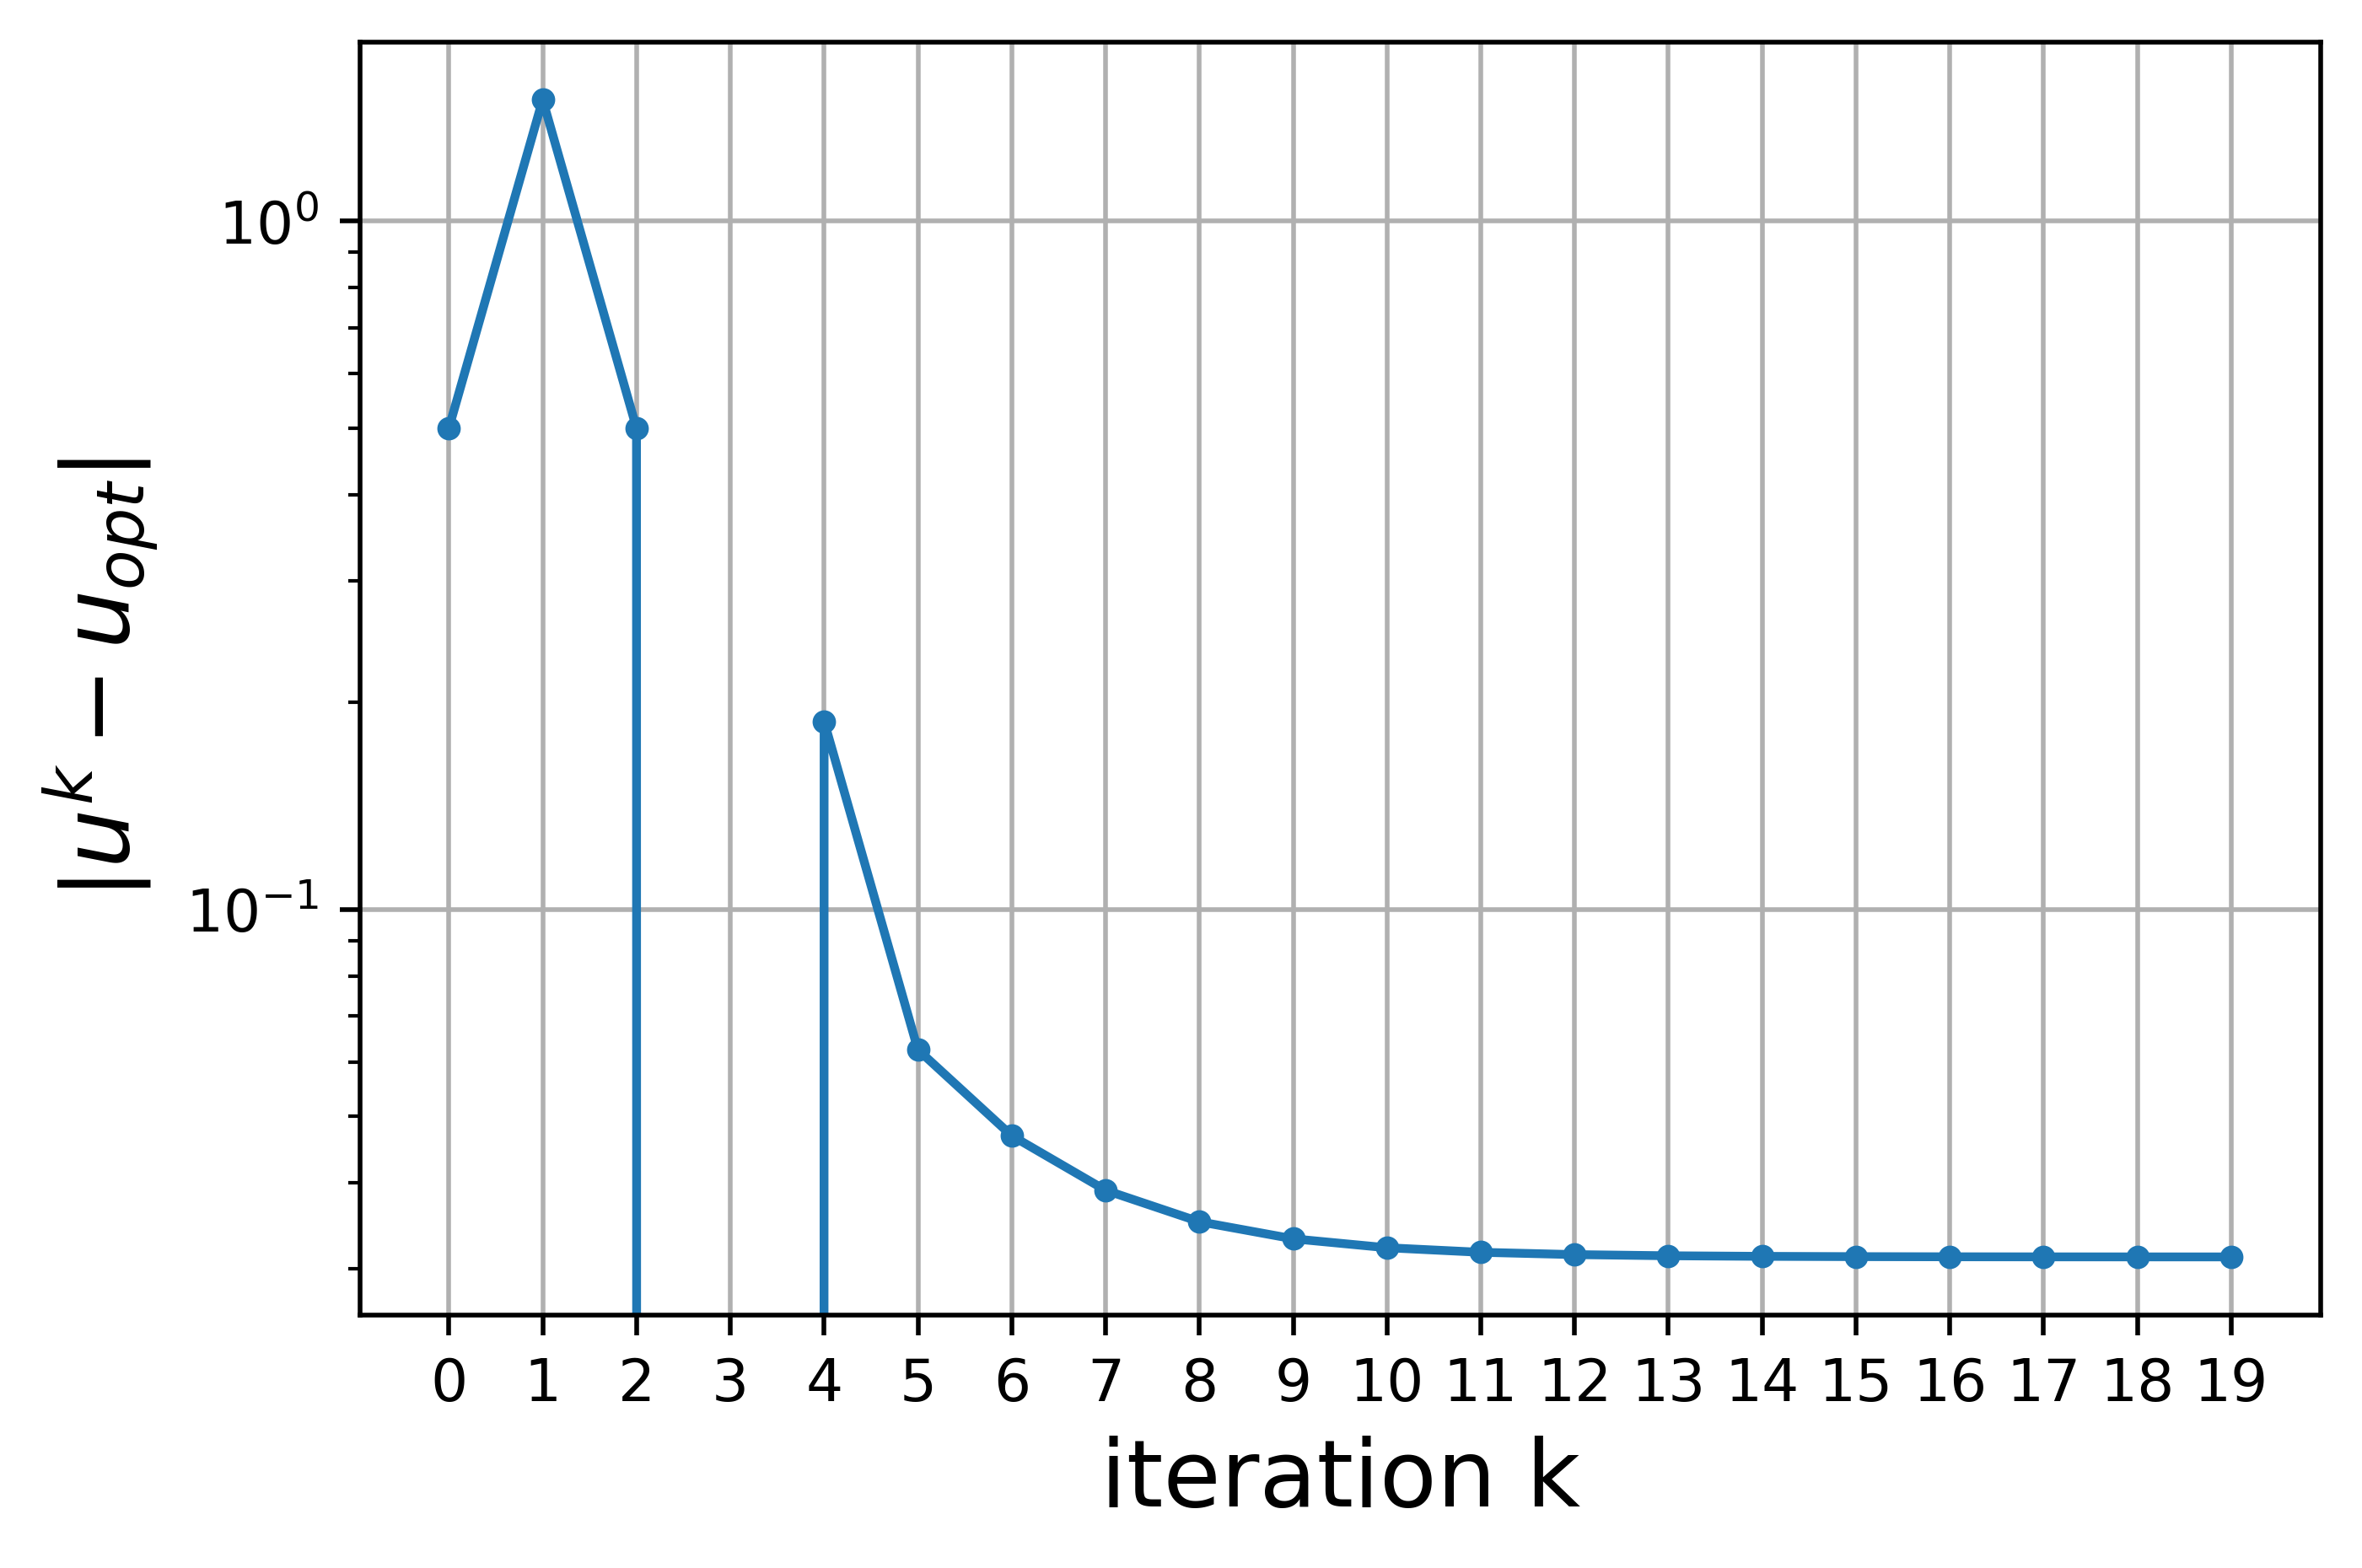

In [126]:
u    = 0
mu_k = 1
rho  = 0.5
maxiter = 20
error = np.zeros(maxiter)

for n in range(maxiter):
    obj_best, i_best = solve_ip(sols,u)
    u = np.max([u - constr(sols[i_best,0], sols[i_best,1], sols[i_best,2], mu_k), 0])
    mu_k *= rho
    error[n] = abs(3.5-u)

print(u, obj_best)

plt.semilogy(range(maxiter),error,".-")
plt.xlabel("iteration k",fontsize=16)
plt.ylabel("$|u^k-u_{opt}|$",fontsize=16)
plt.xticks(range(maxiter))
plt.grid(True)

We see that the error of the subgradient algorithm does not reach machine precision. Precisely the error is larger than $10^{-2}$ for all iterations. We can prevent this from happening when choosing $\rho=0.8$.
To show that the lagrangian subproblems don't have a unique solution, we reformulate the lagrangian dual as:
\begin{gather}
\max (10-3u)y_1 + (4-u)y_2 + (14-4u)y_3 + 4u\\
y_1,y_2,y_3 \in \mathbb{B}
\end{gather}
When we insert the optimal u we see that the third term vanishes and therefore we can choose the value of $y_3$ as 1 or 0 without changing the objective value. This shows that the lagrangian dual has a non-unique solution.